In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import cv2
import os
import seaborn as sns

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import load_model


from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

In [3]:
train_dir = r"/content/drive/MyDrive/new project data (1)/train"
test_dir = r"/content/drive/MyDrive/new project data (1)/test"
val_dir = r"/content/drive/MyDrive/new project data (1)/val"
data_dir = r"/content/drive/MyDrive/new project data (1)"

In [19]:
SIZE = 224

train_images = []
train_labels = []

for directory_path in glob.glob(train_dir + "/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load img as grayscale
        img = cv2.resize(img, (SIZE, SIZE))
        # Normalizing pixel values between 0 and 1
        #img = img.astype('float32') / 255.0

        img = np.expand_dims(img, axis=-1)
        train_images.append(img)
        train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

class_19
class_16
class_21
class_22
class_20
class_18
class_17
class_06
class_14
class_09
class_08
class_13
class_12
class_11
class_10
class_07
class_15
class_02
class_00
class_05
class_04
class_03
class_01
class_43
class_41
class_42
class_37
class_38
class_40
class_39
class_44
class_29
class_35
class_32
class_36
class_33
class_30
class_31
class_28
class_27
class_34
class_23
class_25
class_24
class_26


In [20]:
SIZE = 224

test_images = []
test_labels = []

for directory_path in glob.glob(test_dir + "/*"):
    fruit_label = directory_path.split("/")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (SIZE, SIZE))
        # Normalizing pixel values between 0 and 1
        #img = img.astype('float32') / 255.0

        img = np.expand_dims(img, axis=-1)
        test_images.append(img)
        test_labels.append(fruit_label)  # Use fruit_label as the label

test_images = np.array(test_images)
#test_images = test_images.astype('float32') / 255.0
test_labels = np.array(test_labels)

class_19
class_22
class_21
class_18
class_14
class_17
class_20
class_16
class_13
class_15
class_11
class_06
class_09
class_04
class_12
class_03
class_10
class_05
class_07
class_08
class_01
class_02
class_00
class_43
class_41
class_44
class_42
class_39
class_40
class_37
class_35
class_36
class_31
class_38
class_34
class_29
class_32
class_30
class_33
class_28
class_23
class_26
class_27
class_24
class_25


In [21]:
SIZE = 224

val_images = []
val_labels = []

for directory_path in glob.glob(val_dir + "/*"):
    fruit_label = directory_path.split("/")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (SIZE, SIZE))
        # Normalizing pixel values between 0 and 1
        #img = img.astype('float32') / 255.0

        img = np.expand_dims(img, axis=-1)
        val_images.append(img)
        val_labels.append(fruit_label)  # Use fruit_label as the label

val_images = np.array(val_images)
# val_images = val_images.astype('float32') / 255.0
val_labels = np.array(val_labels)

class_16
class_21
class_17
class_15
class_22
class_18
class_19
class_20
class_13
class_14
class_04
class_07
class_11
class_03
class_05
class_06
class_12
class_10
class_08
class_09
class_00
class_02
class_01
class_38
class_39
class_42
class_43
class_36
class_44
class_41
class_40
class_35
class_37
class_30
class_28
class_27
class_34
class_32
class_26
class_31
class_25
class_29
class_33
class_23
class_24


In [22]:
from sklearn.preprocessing import LabelEncoder
# Encode labels
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
val_labels_encoded = le.transform(val_labels)
test_labels_encoded = le.transform(test_labels)

In [23]:
print(test_labels_encoded)

[19 19 19 19 19 19 22 22 22 22 22 22 21 21 21 21 21 21 18 18 18 18 18 18
 14 14 14 14 14 14 17 17 17 17 17 17 20 20 20 20 20 20 16 16 16 16 16 16
 13 13 13 13 13 13 15 15 15 15 15 15 11 11 11 11 11 11  6  6  6  6  6  6
  9  9  9  9  9  9  4  4  4  4  4  4 12 12 12 12 12 12  3  3  3  3  3  3
 10 10 10 10 10 10  5  5  5  5  5  5  7  7  7  7  7  7  8  8  8  8  8  8
  1  1  1  1  1  1  2  2  2  2  2  0  0  0  0  0  0 43 43 43 43 43 43 41
 41 41 41 41 41 44 44 44 44 44 44 42 42 42 42 42 42 39 39 39 39 39 39 40
 40 40 40 40 40 37 37 37 37 37 37 35 35 35 35 35 35 36 36 36 36 36 36 31
 31 31 31 31 31 38 38 38 38 38 38 34 34 34 34 34 34 29 29 29 29 29 29 32
 32 32 32 32 32 30 30 30 30 30 30 33 33 33 33 33 33 28 28 28 28 28 28 23
 23 23 23 23 23 26 26 26 26 26 26 27 27 27 27 27 27 24 24 24 24 24 24 25
 25 25 25 25 25]


In [24]:
import tensorflow as tf
from keras.models import load_model
# Load the pre-trained model
pretrained_model = tf.keras.models.load_model('/content/drive/MyDrive/project face/vgg_updated_model.h5')

# Set the layers of the pre-trained model as non-trainable
for layer in pretrained_model.layers:
    layer.trainable = False

# Add a Flatten layer to the pre-trained model
x = tf.keras.layers.Flatten()(pretrained_model.output)


In [25]:
x = tf.keras.layers.Dense(360, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Add 20% dropout
x = tf.keras.layers.Dense(180, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Add 25% dropout
x = tf.keras.layers.Dense(90, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Add 25% dropout
x = tf.keras.layers.Dense(45, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Add 25% dropout

# Add the output layer with the appropriate number of units (e.g., for classification)
num_classes = 45  # Update this with your specific number of classes
output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
# Create a new model with the pre-trained base and custom top
model = tf.keras.Model(inputs=pretrained_model.input, outputs=output)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]


from tensorflow.keras.callbacks import LearningRateScheduler
# Define a learning rate schedule function
# Define a learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Example: Compile the model with the learning rate scheduler callback
'''model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])'''


# Compile the model with the specified optimizer and loss function

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


In [26]:
# Train the model
model.fit(
    train_images,
    train_labels_encoded,
    validation_data=(val_images, val_labels_encoded),
    epochs=50,
    batch_size=16,
    callbacks=[lr_scheduler],
)

Epoch 1/50
43/43 [==============================] - 7s 104ms/step - loss: 12.5053 - accuracy: 0.0222 - val_loss: 9.9397 - val_accuracy: 0.0519 - lr: 0.0010
Epoch 2/50
43/43 [==============================] - 4s 92ms/step - loss: 9.5626 - accuracy: 0.0370 - val_loss: 8.6171 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 3/50
43/43 [==============================] - 4s 92ms/step - loss: 8.2907 - accuracy: 0.0459 - val_loss: 7.7390 - val_accuracy: 0.0815 - lr: 0.0010
Epoch 4/50
43/43 [==============================] - 4s 93ms/step - loss: 7.5295 - accuracy: 0.0578 - val_loss: 7.1341 - val_accuracy: 0.0889 - lr: 0.0010
Epoch 5/50
43/43 [==============================] - 4s 94ms/step - loss: 6.9600 - accuracy: 0.0696 - val_loss: 6.5980 - val_accuracy: 0.0926 - lr: 0.0010
Epoch 6/50
43/43 [==============================] - 4s 86ms/step - loss: 6.5521 - accuracy: 0.0904 - val_loss: 6.2194 - val_accuracy: 0.1296 - lr: 0.0010
Epoch 7/50
43/43 [==============================] - 4s 86ms/step - loss: 6

Epoch 1/50
43/43 [==============================] - 4s 94ms/step - loss: 3.0676 - accuracy: 0.5526 - val_loss: 3.7370 - val_accuracy: 0.5074 - lr: 0.0010
Epoch 2/50
43/43 [==============================] - 4s 94ms/step - loss: 4.0473 - accuracy: 0.4533 - val_loss: 3.5670 - val_accuracy: 0.6370 - lr: 0.0010
Epoch 3/50
43/43 [==============================] - 4s 92ms/step - loss: 3.9568 - accuracy: 0.4800 - val_loss: 3.3716 - val_accuracy: 0.6926 - lr: 0.0010
Epoch 4/50
43/43 [==============================] - 4s 92ms/step - loss: 3.5016 - accuracy: 0.5674 - val_loss: 2.9154 - val_accuracy: 0.7556 - lr: 0.0010
Epoch 5/50
43/43 [==============================] - 4s 93ms/step - loss: 3.3614 - accuracy: 0.5778 - val_loss: 2.8854 - val_accuracy: 0.7630 - lr: 0.0010
Epoch 6/50
43/43 [==============================] - 4s 88ms/step - loss: 3.1164 - accuracy: 0.6252 - val_loss: 2.7420 - val_accuracy: 0.7741 - lr: 0.0010
Epoch 7/50
43/43 [==============================] - 4s 93ms/step - loss: 2.9

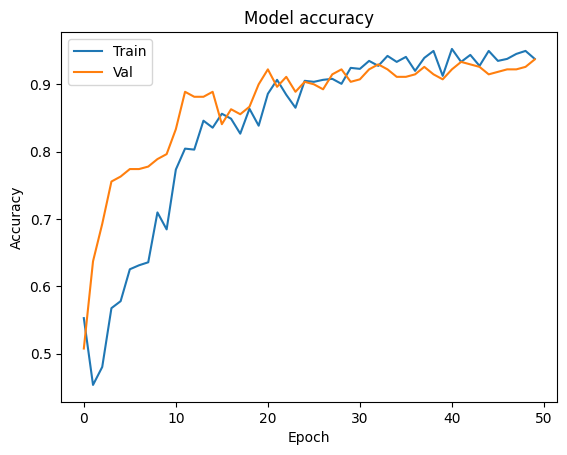

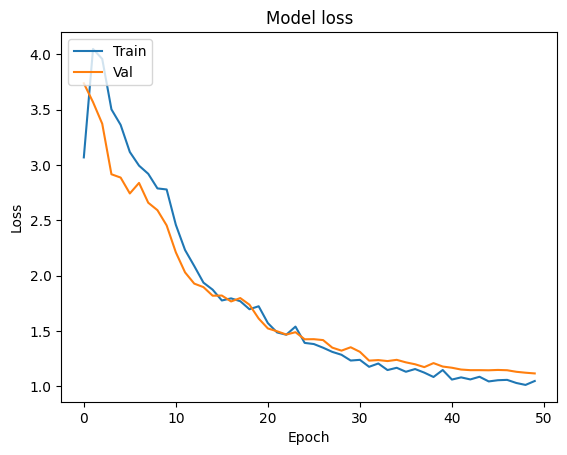

In [28]:
import matplotlib.pyplot as plt

# Train the model and capture the history
history = model.fit(
    train_images,
    train_labels_encoded,
    validation_data=(val_images, val_labels_encoded),
    epochs=50,
    batch_size=16,
    callbacks=[lr_scheduler],
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [49]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      640       
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

9/9 [==============================] - 1s 108ms/step - loss: 1.1037 - accuracy: 0.9257
Test loss: 1.1037, Test accuracy: 0.9257
9/9 [==============================] - 1s 108ms/step


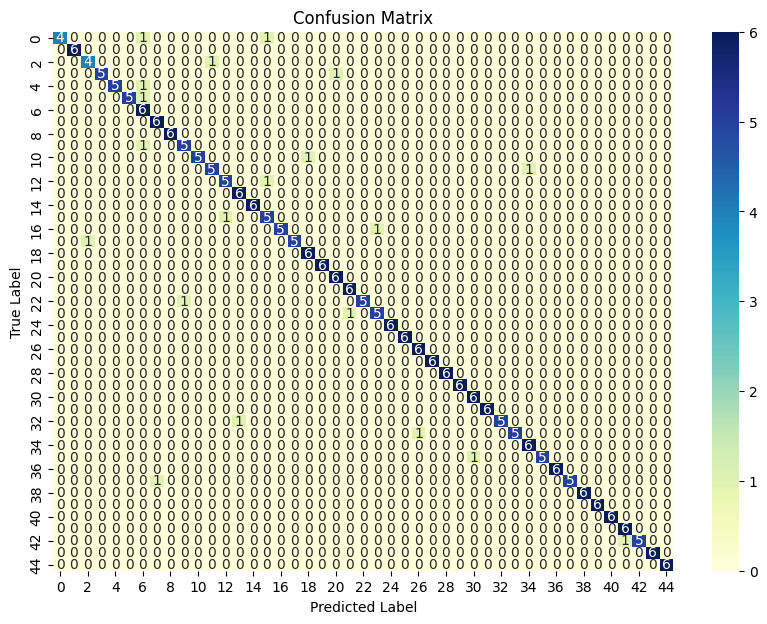

              precision    recall  f1-score   support

    class_00       1.00      0.67      0.80         6
    class_01       1.00      1.00      1.00         6
    class_02       0.80      0.80      0.80         5
    class_03       1.00      0.83      0.91         6
    class_04       1.00      0.83      0.91         6
    class_05       1.00      0.83      0.91         6
    class_06       0.60      1.00      0.75         6
    class_07       0.86      1.00      0.92         6
    class_08       1.00      1.00      1.00         6
    class_09       0.83      0.83      0.83         6
    class_10       1.00      0.83      0.91         6
    class_11       0.83      0.83      0.83         6
    class_12       0.83      0.83      0.83         6
    class_13       0.86      1.00      0.92         6
    class_14       1.00      1.00      1.00         6
    class_15       0.71      0.83      0.77         6
    class_16       1.00      0.83      0.91         6
    class_17       1.00    

In [30]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_encoded)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

# Predict classes
y_pred = np.argmax(model.predict(test_images), axis=1)

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(test_labels_encoded, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print the classification report
from sklearn.metrics import classification_report

print(classification_report(test_labels_encoded, y_pred, target_names=le.classes_))


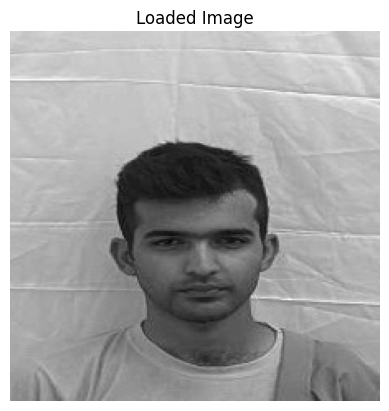

Image shape: (224, 224)
Minimum pixel value: 88, Maximum pixel value: 221
1/1 [==============================] - 0s 19ms/step
Predicted class: [4]


In [55]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the custom image as grayscale
image_path = '/content/drive/MyDrive/new project data (1)/test/class_04/image61_contrast_decreased.jpg_face_0.jpg'
custom_image = Image.open(image_path).convert('L')  # Load as grayscale
custom_image = custom_image.resize((224, 224))  # Resize the image according to your model's input size

# Display the loaded image
plt.imshow(custom_image, cmap='gray')
plt.axis('off')
plt.title('Loaded Image')
plt.show()

# Convert the image to a numpy array
custom_image_np = np.array(custom_image)

# Check image shape and range of pixel values
print(f"Image shape: {custom_image_np.shape}")
print(f"Minimum pixel value: {np.min(custom_image_np)}, Maximum pixel value: {np.max(custom_image_np)}")

# Normalize pixel values to be between 0 and 1
custom_image_normalized = custom_image_np.astype('float32')

# Add a batch dimension
custom_image_normalized = np.expand_dims(custom_image_normalized, axis=0)

# Make predictions
predictions = model.predict(custom_image_normalized)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Print or use the predicted class
print(f"Predicted class: {predicted_class}")

